In this notebook, 

In [ ]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np 

import sys
import os 

plt.ioff()

Our module utilizes a lot of recursion. The default limit in Python is 1000, so we increase that limit to avoid potential recursion related crashes. 

In [3]:
sys.setrecursionlimit(10000) 

We import two functions from our module (simulation.py): one to generate our particle distribution if desired (genParticles), and the ODE integrator function (leapfrog). More information about them will be documented below.

In [4]:
from simulation import genParticles, leapfrog

These are the free parameters of the simulation. These can be changed at will and are documented as follows: 

In [15]:
L = 1 # side box length of the simulation, which will span from [-L/2, L/2] on both sides
rand_type = 2 # type of random distribution to use for creating the particle data. 1 - uniform, 2 - normal 
sig= 0.1 # The standard deviation to use if creating particle data with normal distribution
mu = 0.05 # the mean to use if creating particle data with normal distribution
N = 50 # The number of particles in the simulation 
theta = 0.5 # the opening angle which determines if the algorithm looks at cluster-level or individual-level masses
epsilon = 1e-3 # softening length of the simulation, limiting the max gravitational interaction 
m_scale = 1e3  # mass scaling factor of the simulation, increasing gravitational acceleration by a linear multiplier

particle_path=None # path to particle data, default being './data/example/particles.csv'
store=True # if we need to store our particle results 

We now generate our particles using the information above. In this example, we are using the normal distribution with a given standard deviation and mean. We will also do a basic scatter plot visualization of the particle data. 

Particle data generated via normal distribution with the following parameters: 
sigma = 0.1; mu = 0.05.


<IPython.core.display.Javascript object>


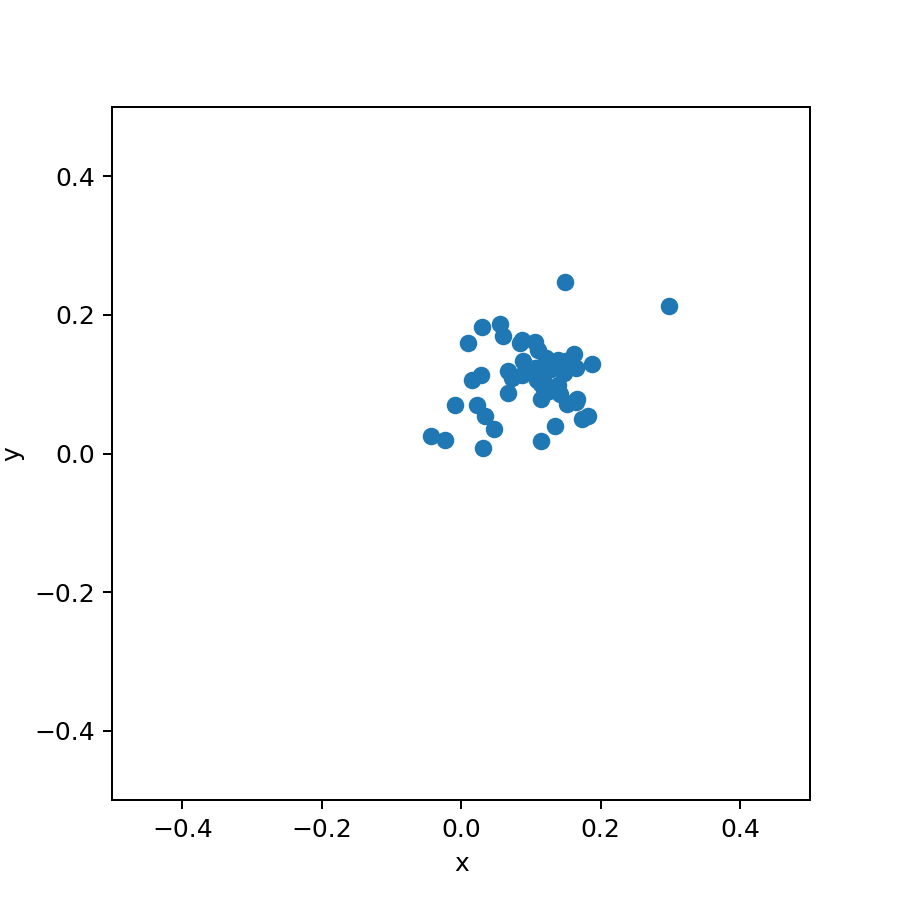

In [16]:
if particle_path is None: 
    if rand_type == 1: 
        print('Particle data generated via uniform distribution.')
    elif rand_type == 2: 
        print('Particle data generated via normal distribution with the following parameters: \nsigma = {}; mu = {}.'.format(sig, mu))
    particles = genParticles(rand_type, mu=mu, sig=sig, L=L, N=N)
else: 
    print('Particle data read from the following directory: {}'.format(particle_path))
    particles = np.loadtxt(particle_path)
    
# visualizing the scatter
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(particles[:, 0], particles[:, 1])
ax.set_xlim(-L/2, L/2)
ax.set_ylim(-L/2, L/2)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

We will now run our simulation, storing the particle data if desired. 

In [30]:
if store:
    storedir = 'L{}n{}'.format(L, N)
    storedir = './data/{}'.format(storedir)

    if not os.path.isdir(storedir):
        os.mkdir(storedir)
            
print('Simulation running with the following parameters:') 
print('L = {}; N = {}; theta = {}; softening = {}; M_scale = {}.'.format(L, N, theta, epsilon, m_scale))
if store:
    print('Particle data will be stored in {}\n'.format(storedir)) 

leapfrog(particles, L=L, theta=theta, epsilon=epsilon, m_scale=m_scale, store=store, path=storedir)

Simulation running with the following parameters:
L = 3.0; N = 4; theta = 0.2; softening = 0.01; M_scale = 1000.0.
Particle data will be stored in ./data/L3.0n4



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 1299.17it/s]


array([ 0.  ,  0.01,  0.02, ...,  9.98,  9.99, 10.  ])

We can also run our simulation from command line using fiducial parameters. 

In [21]:
%run simulation.py

Particle data generated via uniform distribution.
Simulation running with the following parameters:
L = 1; N = 3; theta = 0.5; softening = 0.001; M_scale = 1000.0.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 2972.93it/s]


Here is an example with some inputed parameters:

In [31]:
%run simulation.py -L 2 -opening_angle 0.2 -softening 1e-2 -N 100 -rand_type 2 0.2 0.3 --store

Particle data generated via normal distribution with the following parameters: 
sigma = 0.2; mu = 0.3.
Simulation running with the following parameters:
L = 2.0; N = 100; theta = 0.2; softening = 0.01; M_scale = 1000.0.
Particle data will be stored in ./data/L2.0n100



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [03:09<00:00,  5.27it/s]

Parameter file written to: ./data/L2.0n100


We can also specify the input file:

In [28]:
%run simulation.py --store -f ./data/example/particles.csv 

Particle data read from the following directory: ./data/example/particles.csv
Simulation running with the following parameters:
L = 1; N = 4; theta = 0.5; softening = 0.001; M_scale = 1000.0.
Particle data will be stored in ./data/L1n4



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 1164.46it/s]

Parameter file written to: ./data/L1n4


Also with modified parameters: 

In [29]:
%run simulation.py -L 3 -opening_angle 0.2 -softening 1e-2 -rand_type 0 --store -f ./data/example/particles.csv 

Particle data read from the following directory: ./data/example/particles.csv
Simulation running with the following parameters:
L = 3.0; N = 4; theta = 0.2; softening = 0.01; M_scale = 1000.0.
Particle data will be stored in ./data/L3.0n4



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 1230.04it/s]

Parameter file written to: ./data/L3.0n4


Note that specifying a file will supersede creating particles via random distributions. 